In [ ]:
# mv this notebook in src folder
# or
# set sys path to src folder
import os, sys
path_to_scr_folder=os.path.join(os.path.dirname(os.path.abspath('')), 'src')
sys.path.append(path_to_scr_folder)

In [ ]:
import importlib
import json
import pandas as pd
import projection
import read_chroma
import numpy as np
import benchmark_metrics
import glob
import utils
import plot
from skimage.feature import peak_local_max
from skimage.restoration import estimate_sigma
import peak_simulation
import math
import matplotlib.pyplot as plt

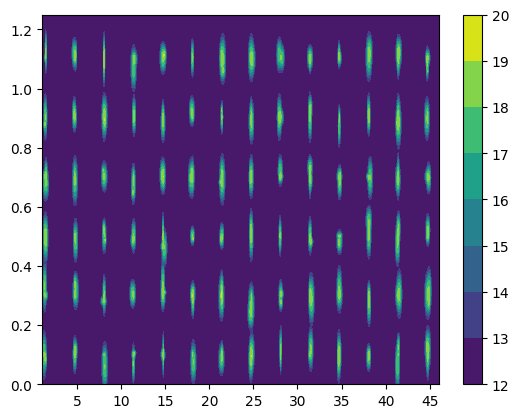

In [2]:
chromato_obj=read_chroma.read_chroma("G:/SIMULATION/simulation_strong_overlap.cdf")
chromato, time_rn, spectra_obj=chromato_obj
plot.visualizer((chromato, time_rn))

In [3]:
noisy_chromato_obj=read_chroma.read_chroma("G:/SIMULATION/noisy_simulation_strong_overlap.cdf")
noisy_chromato, noisy_time_rn, noisy_spectra_obj=noisy_chromato_obj
noisy_intense_chromato_obj=read_chroma.read_chroma("G:/SIMULATION/noisy_intense_simulation_strong_overlap.cdf")
noisy_intense_chromato, noisy_intense_time_rn, noisy_intense_spectra_obj=chromato_obj

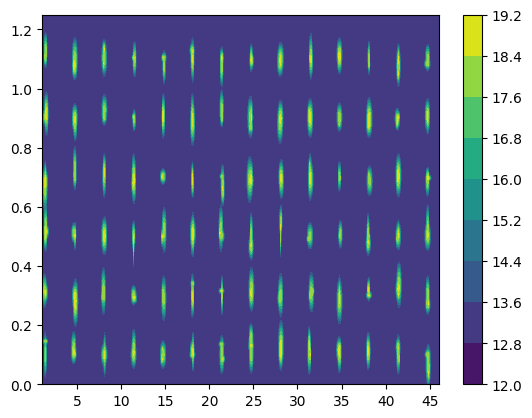

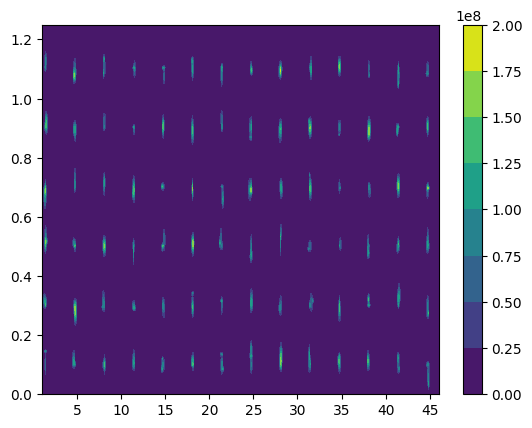

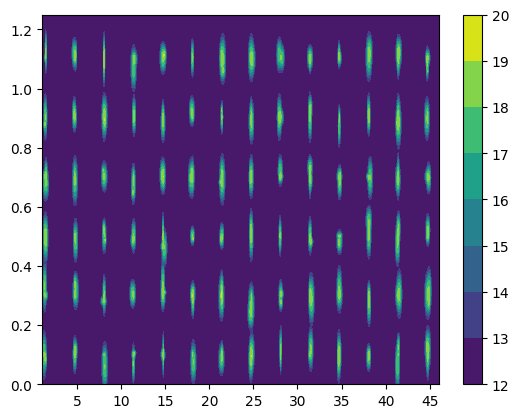

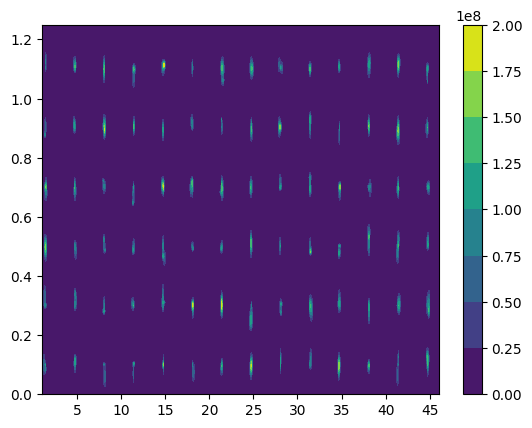

In [4]:
plot.visualizer((noisy_chromato, time_rn))
plot.visualizer((noisy_chromato, time_rn), log_chromato=False)
plot.visualizer((noisy_intense_chromato, time_rn))
plot.visualizer((noisy_intense_chromato, time_rn), log_chromato=False)

In [5]:
def group_metrics(json_name, json_path="G:/SIMULATION/", tables_path= "", prefix=""):
    recall = []
    DoG=[]
    LoG=[]
    pers_hom=[]
    peak_local_max=[]
    precision=[]
    for peak_table in glob.glob(tables_path + "/*.csv"):
        if (not prefix in peak_table):
            continue
        print(peak_table)
        metrics = (benchmark_metrics.read_and_compute_metrics(json_path + json_name, peak_table, chromato_obj))
        print(metrics)
        recall.append(metrics[2])
        precision.append(metrics[4])
        if ("DoG" in peak_table):
            DoG.append(metrics)
        elif ("LoG" in peak_table):
            LoG.append(metrics)
        elif ("peak_local_max" in peak_table):
            peak_local_max.append(metrics)
        elif ("persistent_homology" in peak_table):
            pers_hom.append(metrics)

    return recall, DoG, LoG, pers_hom, peak_local_max, precision

In [45]:
importlib.reload(benchmark_metrics)
res_weak, DoG_weak, LoG_weak, pers_hom_weak, peak_local_max_weak, precision_weak=group_metrics("simulation_weak_overlap.json",tables_path="G:/SIMULATION/peak_tables/", prefix='weak')
print("-------------")
res_mid, DoGs_mid, LoGs_mid, pers_homs_mid, peak_local_maxs_mid, precision_medium=group_metrics("simulation_mid_overlap.json", tables_path="G:/SIMULATION/peak_tables/", prefix='mid')
print("-------------")
res_strong, DoG_strong, LoG_strong, pers_hom_strong, peak_local_max_strong, precision_strong=group_metrics("simulation_strong_overlap.json", tables_path="G:/SIMULATION/peak_tables/", prefix='strong')
print("-------------")
metrics=np.array([res_weak,res_mid,res_strong])

G:/SIMULATION/peak_tables\weak_overlap_DoG_3D_cluster_False.csv
(289, 1.3568075117370892, 0.9436619718309859, 1.0938967136150235, 0.8591549295774648, 0.6955017301038062, 0.8062283737024222)
G:/SIMULATION/peak_tables\weak_overlap_DoG_3D_cluster_True.csv
(242, 1.136150234741784, 0.9342723004694836, 0.971830985915493, 0.8075117370892019, 0.8223140495867769, 0.8553719008264463)
G:/SIMULATION/peak_tables\weak_overlap_DoG_mass_per_mass_cluster_False.csv
(553, 2.596244131455399, 0.7464788732394366, 0.8215962441314554, 0.6431924882629108, 0.2875226039783002, 0.31645569620253167)
G:/SIMULATION/peak_tables\weak_overlap_DoG_mass_per_mass_cluster_True.csv
(452, 2.1220657276995305, 0.7230046948356808, 0.7464788732394366, 0.6197183098591549, 0.3407079646017699, 0.35176991150442477)
G:/SIMULATION/peak_tables\weak_overlap_DoG_tic_cluster_True.csv
(198, 0.9295774647887324, 0.4413145539906103, 0.5633802816901409, 0.37089201877934275, 0.47474747474747475, 0.6060606060606061)
G:/SIMULATION/peak_tables\wea

In [46]:
importlib.reload(benchmark_metrics)
noisy_res_weak, DoG_weak, LoG_weak, pers_hom_weak, peak_local_max_weak, precision_weak=group_metrics("noisy_simulation_weak_overlap.json", tables_path="G:/SIMULATION/noisy_peak_tables/", prefix="weak")
print("-------------")
noisy_res_mid, DoGs_mid, LoGs_mid, pers_homs_mid, peak_local_maxs_mid, precision_medium=group_metrics("noisy_simulation_mid_overlap.json", tables_path="G:/SIMULATION/noisy_peak_tables/", prefix="mid")
print("-------------")
noisy_res_strong, DoG_strong, LoG_strong, pers_hom_strong, peak_local_max_strong, precision_strong=group_metrics("noisy_simulation_strong_overlap.json", tables_path="G:/SIMULATION/noisy_peak_tables/", prefix="strong")
print("-------------")
noisy_metrics=np.array([noisy_res_weak,noisy_res_mid,noisy_res_strong])

G:/SIMULATION/noisy_peak_tables\noisy_intense_weak_overlap_peak_local_max_3D_cluster_True.csv
(212, 1.0341463414634147, 0.25365853658536586, 0.33170731707317075, 0.0, 0.24528301886792453, 0.32075471698113206)
G:/SIMULATION/noisy_peak_tables\noisy_intense_weak_overlap_peak_local_max_mass_per_mass_cluster_True.csv
(648, 3.1609756097560977, 0.24878048780487805, 0.3170731707317073, 0.0, 0.0787037037037037, 0.10030864197530864)
G:/SIMULATION/noisy_peak_tables\noisy_intense_weak_overlap_peak_local_max_tic_cluster_True.csv
(182, 0.8878048780487805, 0.0975609756097561, 0.2097560975609756, 0.0, 0.10989010989010989, 0.23626373626373626)
G:/SIMULATION/noisy_peak_tables\noisy_intense_weak_overlap_persistent_homology_tic_cluster_True.csv
(188, 0.9170731707317074, 0.0975609756097561, 0.2097560975609756, 0.0, 0.10638297872340426, 0.22872340425531915)
G:/SIMULATION/noisy_peak_tables\noisy_weak_overlap_DoG_3D_cluster_False.csv
(303, 1.4780487804878049, 0.9365853658536586, 1.1121951219512196, 0.87804878

C:\Users\Stan\AppData\Local\Temp\ipykernel_5596\702895177.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noisy_metrics=np.array([noisy_res_weak,noisy_res_mid,noisy_res_strong])


In [47]:
importlib.reload(benchmark_metrics)
noisy_intense_res_weak, DoG_weak, LoG_weak, pers_hom_weak, peak_local_max_weak, precision_weak=group_metrics("noisy_intense_simulation_weak_overlap.json", tables_path="G:/SIMULATION/noisy_intense_peak_tables/", prefix="weak")
print("-------------")
noisy_intense_res_mid, DoGs_mid, LoGs_mid, pers_homs_mid, peak_local_maxs_mid, precision_medium=group_metrics("noisy_intense_simulation_mid_overlap.json", tables_path="G:/SIMULATION/noisy_intense_peak_tables/", prefix="mid")
print("-------------")
noisy_intense_res_strong, DoG_strong, LoG_strong, pers_hom_strong, peak_local_max_strong, precision_strong=group_metrics("noisy_intense_simulation_strong_overlap.json", tables_path="G:/SIMULATION/noisy_intense_peak_tables/", prefix="strong")
print("-------------")
noisy_intense_metrics=np.array([noisy_intense_res_weak,noisy_intense_res_mid,noisy_intense_res_strong])

G:/SIMULATION/noisy_intense_peak_tables\noisy_intense_weak_overlap_DoG_3D_cluster_False.csv
(278, 1.3301435406698565, 0.9282296650717703, 1.1578947368421053, 0.8660287081339713, 0.697841726618705, 0.8705035971223022)
G:/SIMULATION/noisy_intense_peak_tables\noisy_intense_weak_overlap_DoG_3D_cluster_True.csv
(209, 1.0, 0.8947368421052632, 0.9473684210526315, 0.7894736842105263, 0.8947368421052632, 0.9473684210526315)
G:/SIMULATION/noisy_intense_peak_tables\noisy_intense_weak_overlap_DoG_mass_per_mass_cluster_False.csv
(225, 1.076555023923445, 0.7703349282296651, 0.7990430622009569, 0.6650717703349283, 0.7155555555555555, 0.7422222222222222)
G:/SIMULATION/noisy_intense_peak_tables\noisy_intense_weak_overlap_DoG_mass_per_mass_cluster_True.csv
(209, 1.0, 0.7607655502392344, 0.7703349282296651, 0.6555023923444976, 0.7607655502392344, 0.7703349282296651)
G:/SIMULATION/noisy_intense_peak_tables\noisy_intense_weak_overlap_DoG_tic_cluster_True.csv
(146, 0.6985645933014354, 0.3588516746411483, 0.

In [48]:
importlib.reload(benchmark_metrics)

loc_1000_res_weak, DoG_loc_1000, LoG_loc_1000, pers_hom_loc_1000, peak_local_max_loc_1000, precision_loc_1000=group_metrics("loc_1000_scale_500_poisson_09.json", tables_path="G:/SIMULATION/noisy_loc/", prefix="loc_1000_")
print("-------------")
loc_1500_res_weak, DoG_loc_1500, LoG_loc_1500, pers_hom_loc_1500, peak_local_max_loc_1500, precision_loc_1500=group_metrics("loc_1500_scale_500_poisson_09.json", tables_path="G:/SIMULATION/noisy_loc/", prefix="loc_1500_")
print("-------------")
loc_2000_res_weak, DoG_loc_2000, LoG_loc_2000, pers_hom_loc_2000, peak_local_max_loc_2000, precision_loc_2000=group_metrics("loc_2000_scale_500_poisson_09.json", tables_path="G:/SIMULATION/noisy_loc/", prefix="loc_2000_")
print("-------------")
loc_4000_res_weak, DoG_loc_4000, LoG_loc_4000, pers_hom_loc_4000, peak_local_max_loc_4000, precision_loc_4000=group_metrics("loc_4000_scale_500_poisson_09.json", tables_path="G:/SIMULATION/noisy_loc/", prefix="loc_4000_")
print("-------------")
loc_8000_res_weak, DoG_loc_8000, LoG_loc_8000, pers_hom_loc_8000, peak_local_max_loc_8000, precision_loc_8000=group_metrics("loc_8000_scale_500_poisson_09.json", tables_path="G:/SIMULATION/noisy_loc/", prefix="loc_8000_")
print("-------------")

G:/SIMULATION/noisy_loc\loc_1000_DoG_3D_cluster_True.csv
(217, 1.0533980582524272, 0.6650485436893204, 0.7766990291262136, 0.47572815533980584, 0.631336405529954, 0.7373271889400922)
G:/SIMULATION/noisy_loc\loc_1000_DoG_mass_per_mass_cluster_True.csv
(414, 2.0097087378640777, 0.6699029126213593, 0.7087378640776699, 0.49514563106796117, 0.3333333333333333, 0.3526570048309179)
G:/SIMULATION/noisy_loc\loc_1000_DoG_tic_cluster_True.csv
(134, 0.6504854368932039, 0.07766990291262135, 0.19902912621359223, 0.05825242718446602, 0.11940298507462686, 0.30597014925373134)
G:/SIMULATION/noisy_loc\loc_1000_LoG_mass_per_mass_cluster_True.csv
(282, 1.3689320388349515, 0.6699029126213593, 0.7135922330097088, 0.49514563106796117, 0.48936170212765956, 0.5212765957446809)
G:/SIMULATION/noisy_loc\loc_1000_LoG_tic_cluster_True.csv
(148, 0.7184466019417476, 0.1262135922330097, 0.2669902912621359, 0.0970873786407767, 0.17567567567567569, 0.3716216216216216)
G:/SIMULATION/noisy_loc\loc_1000_peak_local_max_3D_c

In [6]:
poisson_rep_12_res_weak, DoG_poisson_rep_12, LoG_poisson_rep_12, pers_hom_poisson_rep_12, peak_local_max_poisson_rep_12, precision_poisson_rep_12=group_metrics("loc_1000_scale_500_poisson_12.json", tables_path="G:/SIMULATION/noisy_poisson_rep/", prefix="poisson_rep_12")
print("-------------")
poisson_rep_15_res_weak, DoG_poisson_rep_15, LoG_poisson_rep_15, pers_hom_poisson_rep_15, peak_local_max_poisson_rep_15, precision_poisson_rep_15=group_metrics("loc_1000_scale_500_poisson_15.json", tables_path="G:/SIMULATION/noisy_poisson_rep/", prefix="poisson_rep_15")
print("-------------")
poisson_rep_18_res_weak, DoG_poisson_rep_18, LoG_poisson_rep_18, pers_hom_poisson_rep_18, peak_local_max_poisson_rep_18, precision_poisson_rep_18=group_metrics("loc_1000_scale_500_poisson_18.json", tables_path="G:/SIMULATION/noisy_poisson_rep/", prefix="poisson_rep_18")
print("-------------")
poisson_rep_21_res_weak, DoG_poisson_rep_21, LoG_poisson_rep_21, pers_hom_poisson_rep_21, peak_local_max_poisson_rep_21, precision_poisson_rep_21=group_metrics("loc_1000_scale_500_poisson_21.json", tables_path="G:/SIMULATION/noisy_poisson_rep/", prefix="poisson_rep_21")
print("-------------")


G:/SIMULATION/noisy_poisson_rep\poisson_rep_12_DoG_3D_cluster_True.csv
(229, 1.0700934579439252, 0.6822429906542056, 0.7990654205607477, 0.48598130841121495, 0.6375545851528385, 0.7467248908296943)
G:/SIMULATION/noisy_poisson_rep\poisson_rep_12_DoG_mass_per_mass_cluster_True.csv
(259, 1.2102803738317758, 0.6588785046728972, 0.7009345794392523, 0.48598130841121495, 0.5444015444015444, 0.5791505791505791)
G:/SIMULATION/noisy_poisson_rep\poisson_rep_12_DoG_tic_cluster_True.csv
(142, 0.6635514018691588, 0.10747663551401869, 0.19626168224299065, 0.08878504672897196, 0.1619718309859155, 0.29577464788732394)
G:/SIMULATION/noisy_poisson_rep\poisson_rep_12_LoG_mass_per_mass_cluster_True.csv
(238, 1.1121495327102804, 0.6728971962616822, 0.7102803738317757, 0.5093457943925234, 0.6050420168067226, 0.6386554621848739)
G:/SIMULATION/noisy_poisson_rep\poisson_rep_12_LoG_tic_cluster_True.csv
(141, 0.6588785046728972, 0.11682242990654206, 0.2383177570093458, 0.102803738317757, 0.1773049645390071, 0.361

In [9]:
loc_2000_scale_500_poisson_12_overlap_07_099_res_weak, DoG_loc_2000_scale_500_poisson_12_overlap_07_099, LoG_loc_2000_scale_500_poisson_12_overlap_07_099, pers_hom_loc_2000_scale_500_poisson_12_overlap_07_099, peak_local_max_loc_2000_scale_500_poisson_12_overlap_07_099, precision_loc_2000_scale_500_poisson_12_overlap_07_099=group_metrics("loc_2000_scale_500_poisson_12_overlap_07_099.json", tables_path="G:/SIMULATION/noisy_loc_poisson_rep_strong_overlap/", prefix="loc_2000_poisson_rep_12_overlap_07_099")
print("-------------")
loc_2000_scale_500_poisson_15_overlap_07_099_res_weak, DoG_loc_2000_scale_500_poisson_15_overlap_07_099, LoG_loc_2000_scale_500_poisson_15_overlap_07_099, pers_hom_loc_2000_scale_500_poisson_15_overlap_07_099, peak_local_max_loc_2000_scale_500_poisson_15_overlap_07_099, precision_loc_2000_scale_500_poisson_15_overlap_07_099=group_metrics("loc_2000_scale_500_poisson_15_overlap_07_099.json", tables_path="G:/SIMULATION/noisy_loc_poisson_rep_strong_overlap/", prefix="loc_2000_poisson_rep_15_overlap_07_099")
print("-------------")
loc_2000_scale_500_poisson_18_overlap_07_099_res_weak, DoG_loc_2000_scale_500_poisson_18_overlap_07_099, LoG_loc_2000_scale_500_poisson_18_overlap_07_099, pers_hom_loc_2000_scale_500_poisson_18_overlap_07_099, peak_local_max_loc_2000_scale_500_poisson_18_overlap_07_099, precision_loc_2000_scale_500_poisson_18_overlap_07_099=group_metrics("loc_2000_scale_500_poisson_18_overlap_07_099.json", tables_path="G:/SIMULATION/noisy_loc_poisson_rep_strong_overlap/", prefix="loc_2000_poisson_rep_18_overlap_07_099")
print("-------------")
loc_2000_scale_500_poisson_21_overlap_07_099_res_weak, DoG_loc_2000_scale_500_poisson_21_overlap_07_099, LoG_loc_2000_scale_500_poisson_21_overlap_07_099, pers_hom_loc_2000_scale_500_poisson_21_overlap_07_099, peak_local_max_loc_2000_scale_500_poisson_21_overlap_07_099, precision_loc_2000_scale_500_poisson_21_overlap_07_099=group_metrics("loc_2000_scale_500_poisson_21_overlap_07_099.json", tables_path="G:/SIMULATION/noisy_loc_poisson_rep_strong_overlap/", prefix="loc_2000_poisson_rep_21_overlap_07_099")
print("-------------")


G:/SIMULATION/noisy_loc_poisson_rep_strong_overlap\loc_2000_poisson_rep_12_overlap_07_099DoG_3D_cluster_True.csv
(151, 0.7438423645320197, 0.5615763546798029, 0.6600985221674877, 0.4039408866995074, 0.7549668874172185, 0.8874172185430463)
G:/SIMULATION/noisy_loc_poisson_rep_strong_overlap\loc_2000_poisson_rep_12_overlap_07_099DoG_mass_per_mass_cluster_True.csv
(196, 0.9655172413793104, 0.5369458128078818, 0.5960591133004927, 0.39901477832512317, 0.5561224489795918, 0.6173469387755102)
G:/SIMULATION/noisy_loc_poisson_rep_strong_overlap\loc_2000_poisson_rep_12_overlap_07_099DoG_tic_cluster_True.csv
(91, 0.4482758620689655, 0.10837438423645321, 0.28078817733990147, 0.059113300492610835, 0.24175824175824176, 0.6263736263736264)
G:/SIMULATION/noisy_loc_poisson_rep_strong_overlap\loc_2000_poisson_rep_12_overlap_07_099LoG_mass_per_mass_cluster_True.csv
(173, 0.8522167487684729, 0.5517241379310345, 0.5960591133004927, 0.4187192118226601, 0.6473988439306358, 0.6994219653179191)
G:/SIMULATION/no

Text(0, 0.5, 'recall')

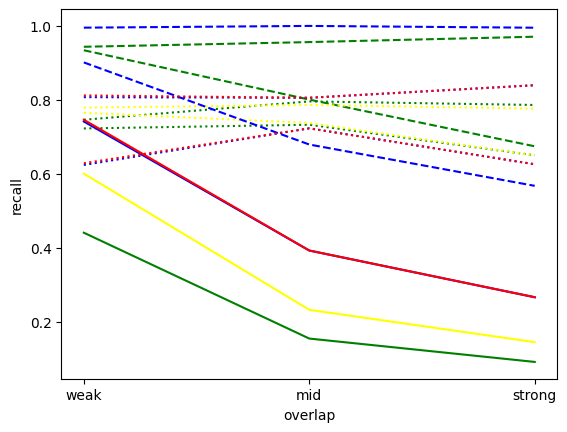

In [49]:
peak_tables = glob.glob("G:/SIMULATION/peak_tables/*.csv")
for i in range (len(res_strong)):
    if ("3D" in peak_tables[i]):
        linestyle='dashed'
    elif ("mass_per_mass" in peak_tables[i]):
        linestyle='dotted'
    else:
        linestyle="solid"
    if ("peak_local_max" in peak_tables[i]):
        color="blue"
    elif ("DoG" in peak_tables[i]):
        color="green"
    elif ("LoG" in peak_tables[i]):
        color="yellow"
    else:
        color="red"
    plt.plot(metrics[:,i], linestyle=linestyle, color=color)
plt.xticks([0,1,2], ["weak","mid","strong"])
plt.xlabel("overlap")
plt.ylabel("recall")

Text(0, 0.5, 'recall')

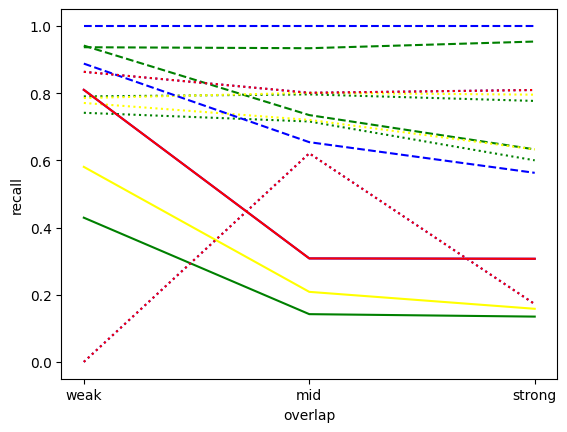

In [93]:
peak_tables = glob.glob("G:/SIMULATION/noisy_peak_tables/*.csv")
for i in range (len(res_strong)):
    if ("3D" in peak_tables[i]):
        linestyle='dashed'
    elif ("mass_per_mass" in peak_tables[i]):
        linestyle='dotted'
    else:
        linestyle="solid"
    if ("peak_local_max" in peak_tables[i]):
        color="blue"
    elif ("DoG" in peak_tables[i]):
        color="green"
    elif ("LoG" in peak_tables[i]):
        color="yellow"
    else:
        color="red"
    plt.plot(noisy_metrics[:,i], linestyle=linestyle, color=color)
plt.xticks([0,1,2], ["weak","mid","strong"])
plt.xlabel("overlap")
plt.ylabel("recall")

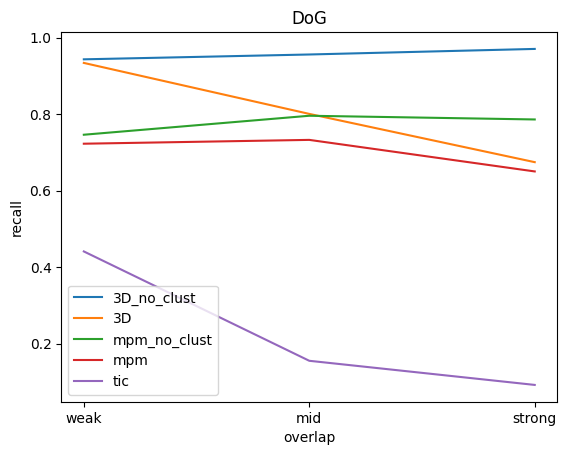

In [50]:
plt.plot(metrics[:,:5], label=['3D_no_clust', '3D','mpm_no_clust','mpm', "tic"])
plt.title('DoG')
plt.xticks( [0,1,2], ["weak","mid","strong"])
plt.xlabel("overlap")
plt.ylabel("recall")
plt.legend(loc='lower left')

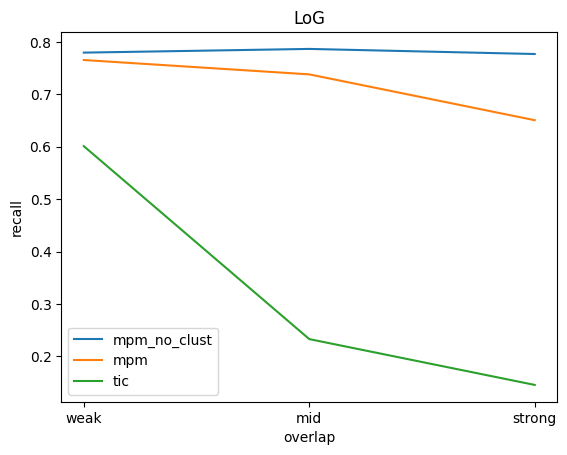

In [51]:
plt.plot(metrics[:,5:8], label=['mpm_no_clust', 'mpm','tic'])
plt.title('LoG')
plt.xticks( [0,1,2], ["weak","mid","strong"])
plt.xlabel("overlap")
plt.ylabel("recall")
plt.legend(loc='lower left')

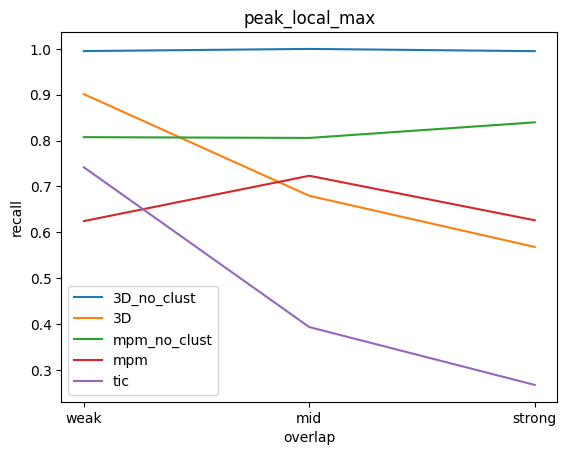

In [52]:
plt.plot(metrics[:,8:13], label=['3D_no_clust', '3D','mpm_no_clust', 'mpm', 'tic'])
plt.title('peak_local_max')
plt.xticks( [0,1,2], ["weak","mid","strong"])
plt.xlabel("overlap")
plt.ylabel("recall")
plt.legend(loc='lower left')

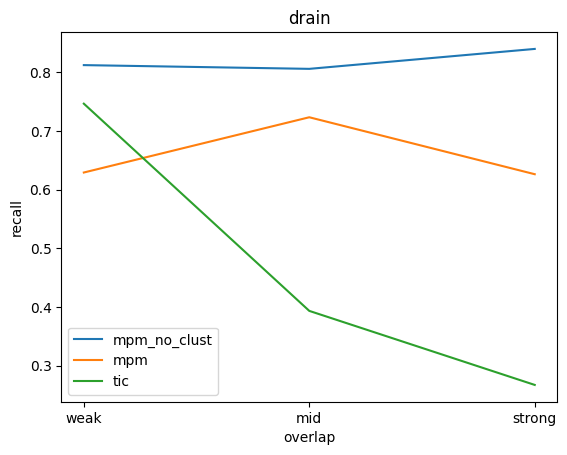

In [53]:
plt.plot(metrics[:,13:16], label=['mpm_no_clust', 'mpm', 'tic'])
plt.title('drain')
plt.xticks( [0,1,2], ["weak","mid","strong"])
plt.xlabel("overlap")
plt.ylabel("recall")
plt.legend(loc='lower left')

LOGIQUE ^^ 

# Recall / Noisy Loc benchmark

## DoG

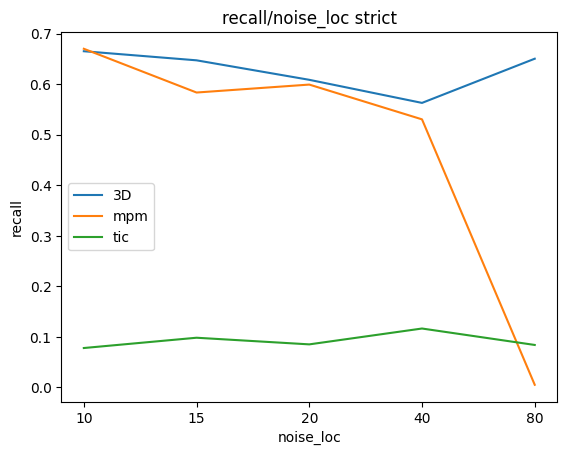

In [66]:
id=2
plt.plot([np.array(DoG_loc_1000)[:,id], np.array(DoG_loc_1500)[:,id], np.array(DoG_loc_2000)[:,id], np.array(DoG_loc_4000)[:,id], np.array(DoG_loc_8000)[:,id]], label=['3D','mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("recall")
plt.title("recall/noise_loc strict")
plt.legend()

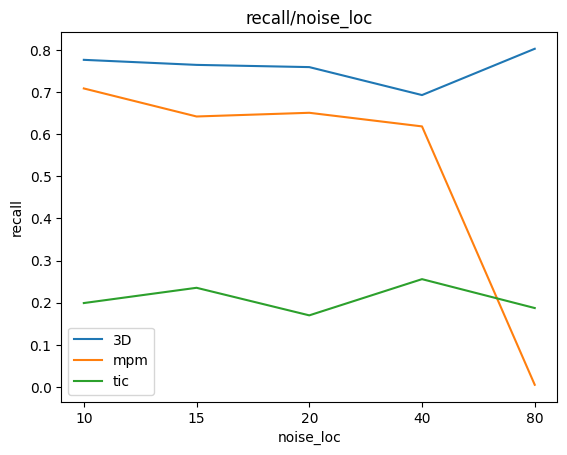

In [64]:
id=3
plt.plot([np.array(DoG_loc_1000)[:,id], np.array(DoG_loc_1500)[:,id], np.array(DoG_loc_2000)[:,id], np.array(DoG_loc_4000)[:,id], np.array(DoG_loc_8000)[:,id]], label=['3D','mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("recall")
plt.title("recall/noise_loc")
plt.legend()

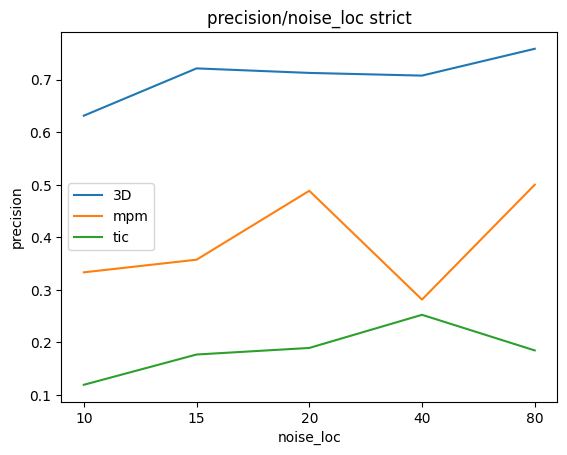

In [68]:
id=5
plt.plot([np.array(DoG_loc_1000)[:,id], np.array(DoG_loc_1500)[:,id], np.array(DoG_loc_2000)[:,id], np.array(DoG_loc_4000)[:,id], np.array(DoG_loc_8000)[:,id]], label=['3D','mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("precision")
plt.title("precision/noise_loc strict")
plt.legend()

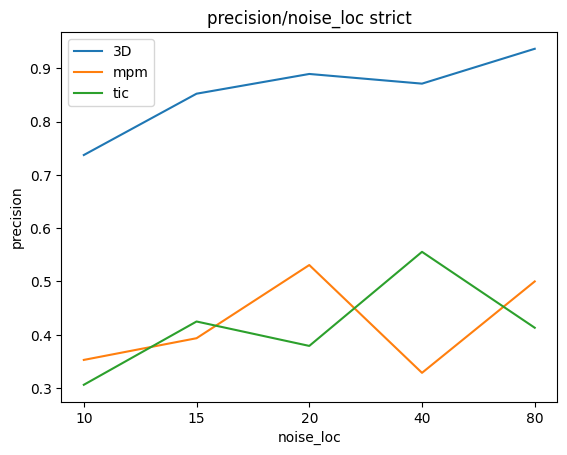

In [69]:
id=6
plt.plot([np.array(DoG_loc_1000)[:,id], np.array(DoG_loc_1500)[:,id], np.array(DoG_loc_2000)[:,id], np.array(DoG_loc_4000)[:,id], np.array(DoG_loc_8000)[:,id]], label=['3D','mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("precision")
plt.title("precision/noise_loc strict")
plt.legend()

## LoG

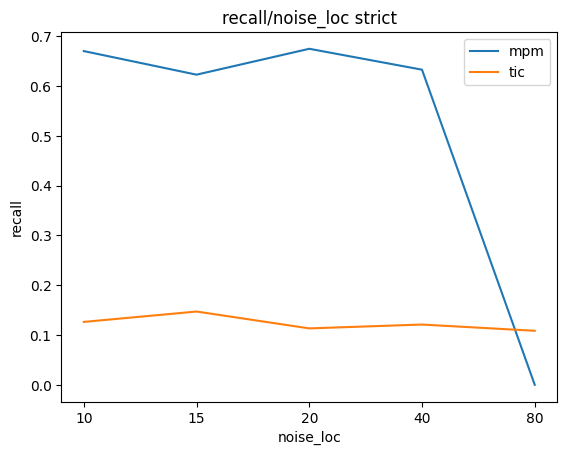

In [72]:
id=2
plt.plot([np.array(LoG_loc_1000)[:,id], np.array(LoG_loc_1500)[:,id], np.array(LoG_loc_2000)[:,id], np.array(LoG_loc_4000)[:,id], np.array(LoG_loc_8000)[:,id]], label=['mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("recall")
plt.title("recall/noise_loc strict")
plt.legend()

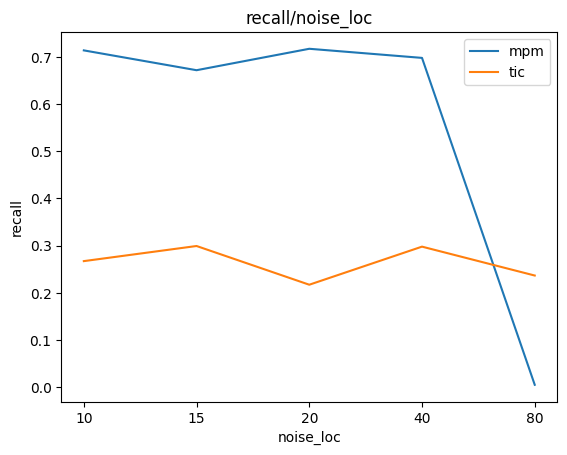

In [73]:
id=3
plt.plot([np.array(LoG_loc_1000)[:,id], np.array(LoG_loc_1500)[:,id], np.array(LoG_loc_2000)[:,id], np.array(LoG_loc_4000)[:,id], np.array(LoG_loc_8000)[:,id]], label=['mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("recall")
plt.title("recall/noise_loc")
plt.legend()

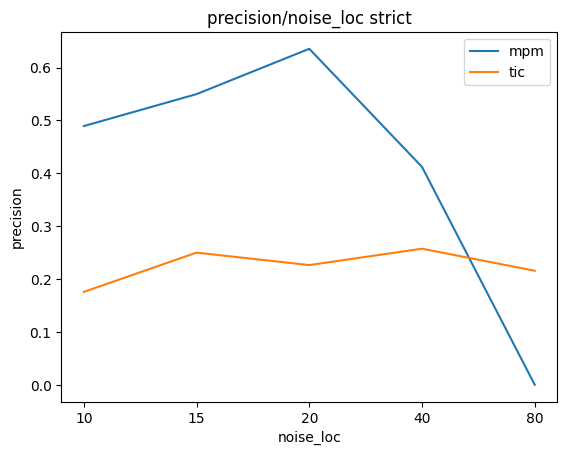

In [74]:
id=5
plt.plot([np.array(LoG_loc_1000)[:,id], np.array(LoG_loc_1500)[:,id], np.array(LoG_loc_2000)[:,id], np.array(LoG_loc_4000)[:,id], np.array(LoG_loc_8000)[:,id]], label=['mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("precision")
plt.title("precision/noise_loc strict")
plt.legend()

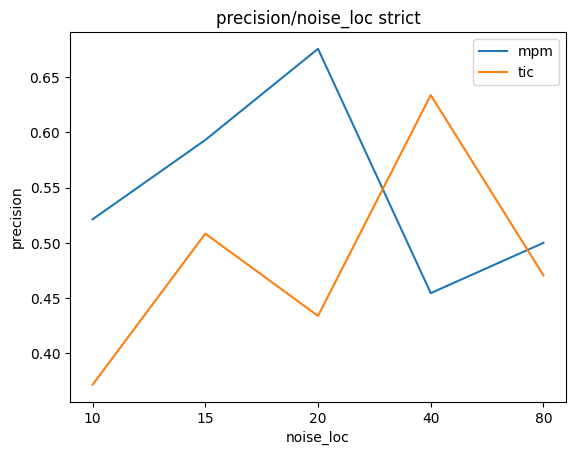

In [75]:
id=6
plt.plot([np.array(LoG_loc_1000)[:,id], np.array(LoG_loc_1500)[:,id], np.array(LoG_loc_2000)[:,id], np.array(LoG_loc_4000)[:,id], np.array(LoG_loc_8000)[:,id]], label=['mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("precision")
plt.title("precision/noise_loc strict")
plt.legend()

## Peak Local Max

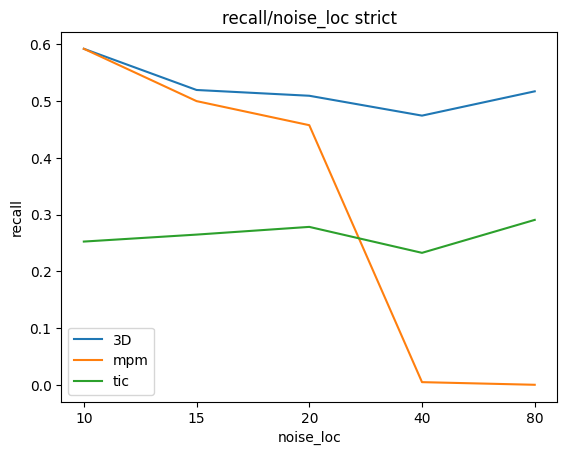

In [78]:
id=2
plt.plot([np.array(peak_local_max_loc_1000)[:,id], np.array(peak_local_max_loc_1500)[:,id], np.array(peak_local_max_loc_2000)[:,id], np.array(peak_local_max_loc_4000)[:,id], np.array(peak_local_max_loc_8000)[:,id]], label=['3D','mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("recall")
plt.title("recall/noise_loc strict")
plt.legend()

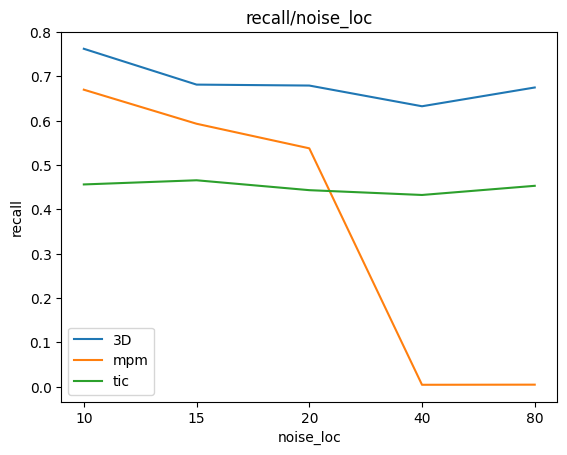

In [79]:
id=3
plt.plot([np.array(peak_local_max_loc_1000)[:,id], np.array(peak_local_max_loc_1500)[:,id], np.array(peak_local_max_loc_2000)[:,id], np.array(peak_local_max_loc_4000)[:,id], np.array(peak_local_max_loc_8000)[:,id]], label=['3D','mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("recall")
plt.title("recall/noise_loc")
plt.legend()

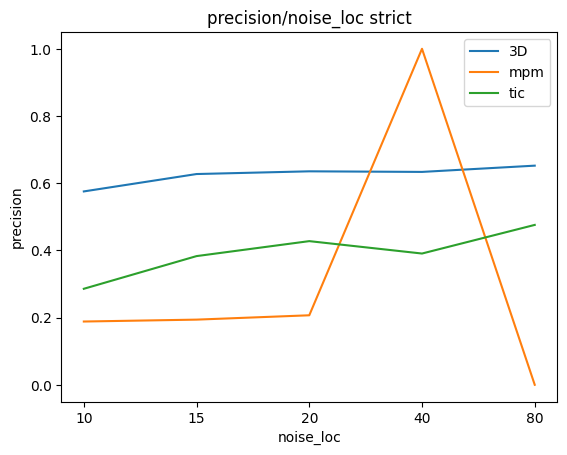

In [80]:
id=5
plt.plot([np.array(peak_local_max_loc_1000)[:,id], np.array(peak_local_max_loc_1500)[:,id], np.array(peak_local_max_loc_2000)[:,id], np.array(peak_local_max_loc_4000)[:,id], np.array(peak_local_max_loc_8000)[:,id]], label=['3D','mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("precision")
plt.title("precision/noise_loc strict")
plt.legend()

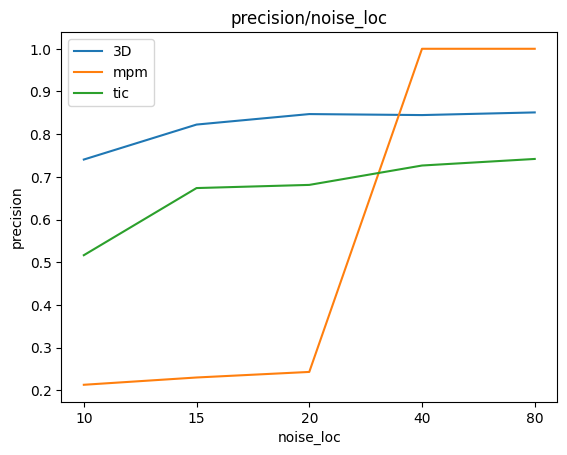

In [81]:
id=6
plt.plot([np.array(peak_local_max_loc_1000)[:,id], np.array(peak_local_max_loc_1500)[:,id], np.array(peak_local_max_loc_2000)[:,id], np.array(peak_local_max_loc_4000)[:,id], np.array(peak_local_max_loc_8000)[:,id]], label=['3D','mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("precision")
plt.title("precision/noise_loc")
plt.legend()

## Drain algorithm

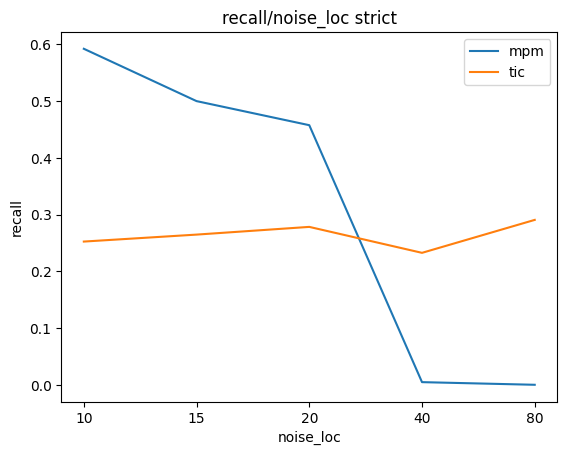

In [82]:
id=2
plt.plot([np.array(pers_hom_loc_1000)[:,id], np.array(pers_hom_loc_1500)[:,id], np.array(pers_hom_loc_2000)[:,id], np.array(pers_hom_loc_4000)[:,id], np.array(pers_hom_loc_8000)[:,id]], label=['mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("recall")
plt.title("recall/noise_loc strict")
plt.legend()

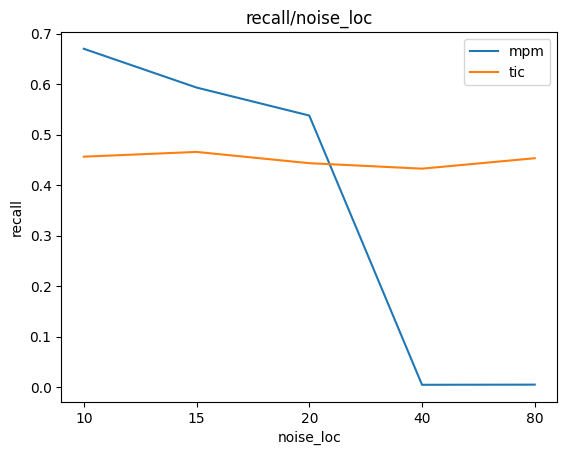

In [83]:
id=3
plt.plot([np.array(pers_hom_loc_1000)[:,id], np.array(pers_hom_loc_1500)[:,id], np.array(pers_hom_loc_2000)[:,id], np.array(pers_hom_loc_4000)[:,id], np.array(pers_hom_loc_8000)[:,id]], label=['mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("recall")
plt.title("recall/noise_loc")
plt.legend()

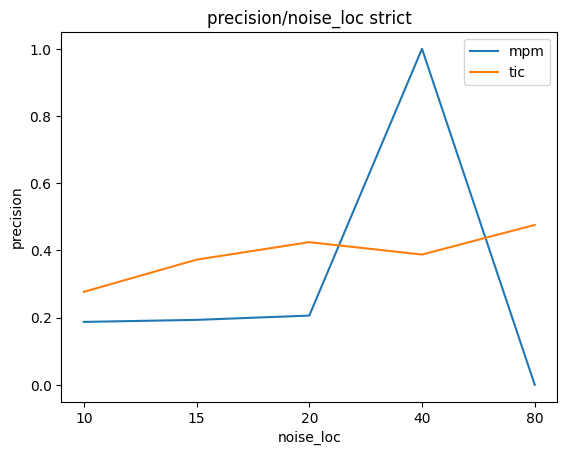

In [84]:
id=5
plt.plot([np.array(pers_hom_loc_1000)[:,id], np.array(pers_hom_loc_1500)[:,id], np.array(pers_hom_loc_2000)[:,id], np.array(pers_hom_loc_4000)[:,id], np.array(pers_hom_loc_8000)[:,id]], label=['mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("precision")
plt.title("precision/noise_loc strict")
plt.legend()

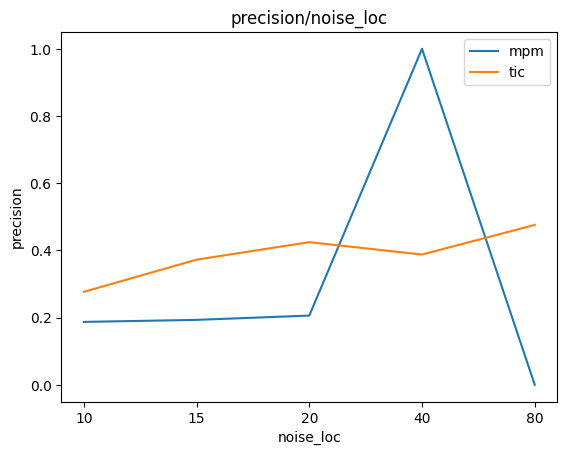

In [85]:
id=5
plt.plot([np.array(pers_hom_loc_1000)[:,id], np.array(pers_hom_loc_1500)[:,id], np.array(pers_hom_loc_2000)[:,id], np.array(pers_hom_loc_4000)[:,id], np.array(pers_hom_loc_8000)[:,id]], label=['mpm', "tic"])
plt.xticks([0,1,2,3,4], ["10","15","20","40", "80"])
plt.xlabel("noise_loc")
plt.ylabel("precision")
plt.title("precision/noise_loc")
plt.legend()

# Verification

In [14]:
chromato_obj_weak_overlap=read_chroma.read_chroma("./SIMULATION/simulation_weak_overlap.cdf")
chromato_obj_mid_overlap=read_chroma.read_chroma("./SIMULATION/simulation_mid_overlap.cdf")
chromato_obj=read_chroma.read_chroma("./SIMULATION/simulation_strong_overlap.cdf")

In [15]:
peaks_gt_weak_overlap, gt_cm_weak_overlapp=benchmark_metrics.compute_gt("./SIMULATION/simulation_weak_overlap.json", chromato_obj)
peaks_gt_mid_overlap, gt_cmp_mid_overlap=benchmark_metrics.compute_gt("./SIMULATION/simulation_mid_overlap.json", chromato_obj)
peaks_gt, gt_cmp=benchmark_metrics.compute_gt("./SIMULATION/simulation_strong_overlap.json", chromato_obj)

In [16]:
peaks_gt_weak_overlap_cd=np.argwhere(peaks_gt_weak_overlap != 0)
peaks_gt_mid_overlap_cd=np.argwhere(peaks_gt_mid_overlap != 0)
peaks_gt_cd=np.argwhere(peaks_gt != 0)
peaks_gt_weak_overlap_cd_in_chromato=projection.matrix_to_chromato(peaks_gt_weak_overlap_cd, chromato_obj[1], 1.25, chromato.shape)
peaks_gt_mid_overlap_cd_in_chromato=projection.matrix_to_chromato(peaks_gt_mid_overlap_cd, chromato_obj[1], 1.25, chromato.shape)
peaks_gt_cd_in_chromato=projection.matrix_to_chromato(peaks_gt_cd, chromato_obj[1], 1.25, chromato.shape)

In [17]:
len(peaks_gt_weak_overlap_cd), len(peaks_gt_mid_overlap_cd), len(peaks_gt_cd)

(214, 214, 210)

In [18]:
sigma = estimate_sigma(chromato_obj_weak_overlap[0], channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_obj_weak_overlap[0])
u_weak_overlap=peak_local_max(chromato_obj_weak_overlap[0], threshold_rel=MIN_SEUIL)
u_weak_overlap_in_chromato=projection.matrix_to_chromato(u_weak_overlap, chromato_obj[1], 1.25, chromato.shape)

sigma = estimate_sigma(chromato_obj_mid_overlap[0], channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_obj_mid_overlap[0])
u_mid_overlap=peak_local_max(chromato_obj_mid_overlap[0], threshold_rel=MIN_SEUIL)
u_mid_overlap_in_chromato=projection.matrix_to_chromato(u_mid_overlap, chromato_obj[1], 1.25, chromato.shape)

sigma = estimate_sigma(chromato_obj[0], channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_obj[0])
u=peak_local_max(chromato_obj[0], threshold_rel=MIN_SEUIL)
u_in_chromato=projection.matrix_to_chromato(u, chromato_obj[1], 1.25, chromato.shape)

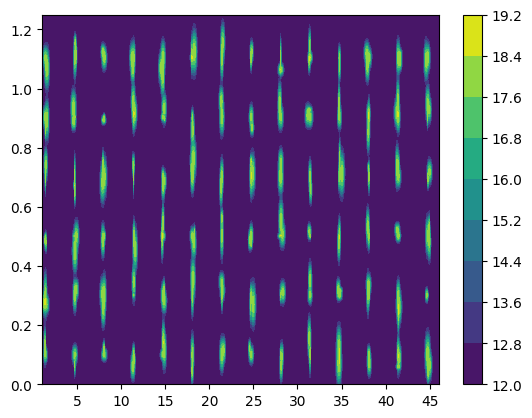

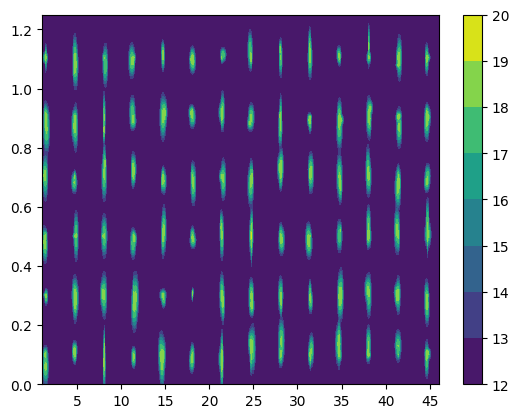

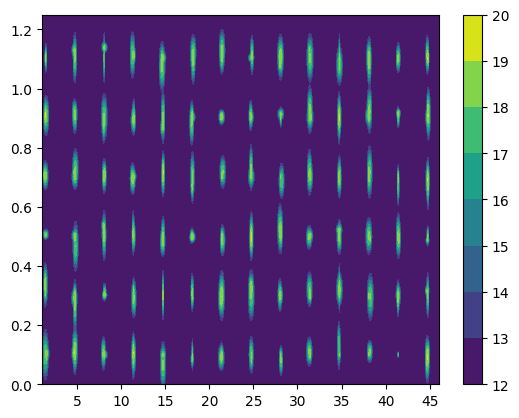

In [19]:
plot.visualizer((chromato_obj_weak_overlap[0], chromato_obj[1]))
plot.visualizer((chromato_obj_mid_overlap[0], chromato_obj[1]))
plot.visualizer((chromato_obj[0], chromato_obj[1]))

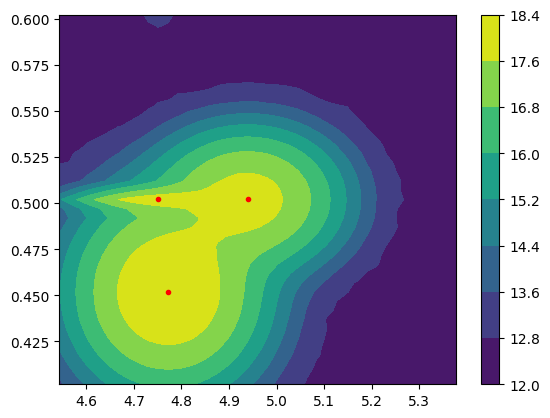

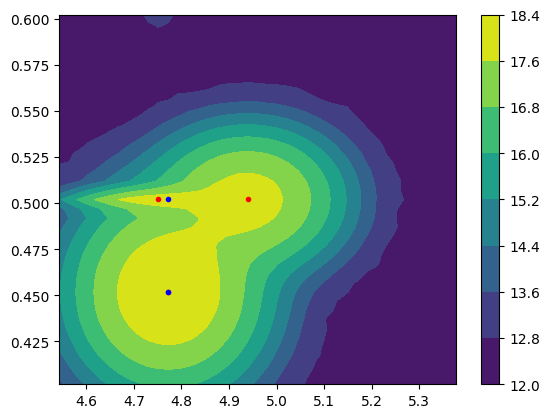

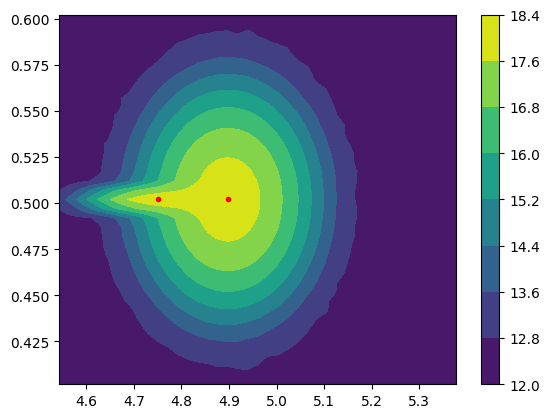

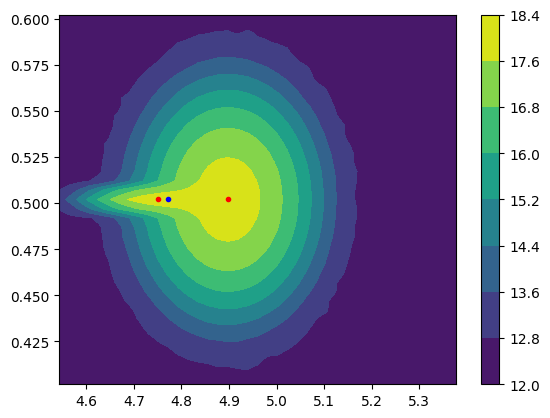

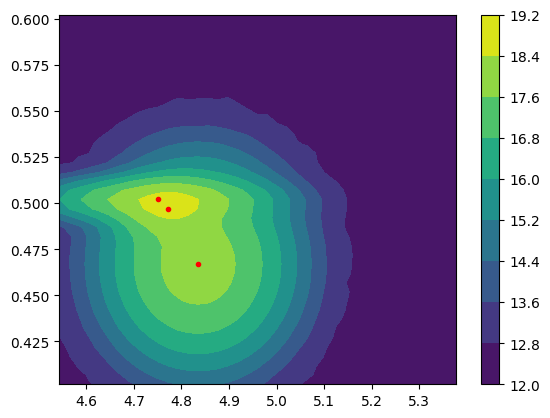

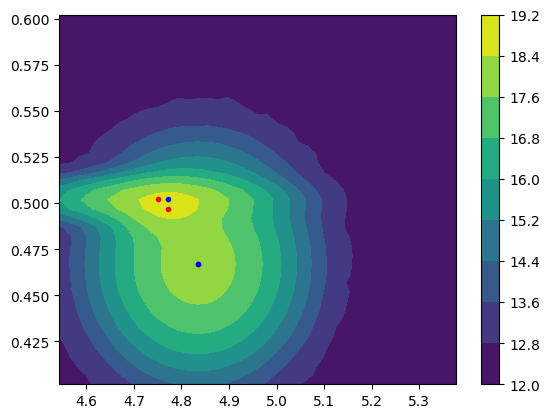

In [20]:
center_pt=[190,100]
center_pt_window_1=20
center_pt_window_2=20

plot.visualizer((chromato_obj_weak_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_weak_overlap_cd_in_chromato)
plot.visualizer((chromato_obj_weak_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_weak_overlap_cd_in_chromato, contour=u_weak_overlap_in_chromato)

plot.visualizer((chromato_obj_mid_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_mid_overlap_cd_in_chromato)
plot.visualizer((chromato_obj_mid_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_mid_overlap_cd_in_chromato, contour=u_mid_overlap_in_chromato)

plot.visualizer((chromato_obj[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_cd_in_chromato)
plot.visualizer((chromato_obj[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_cd_in_chromato, contour=u_in_chromato)

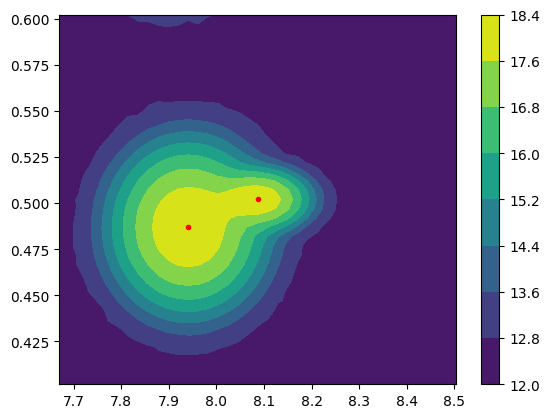

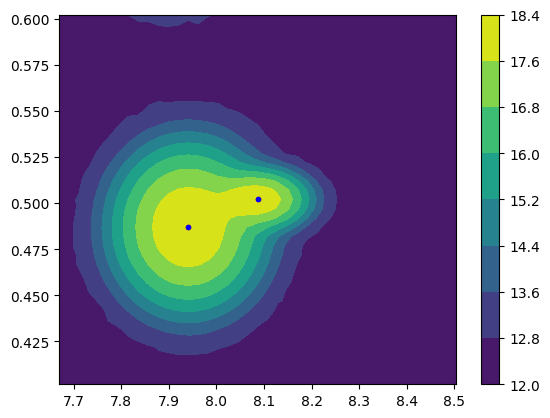

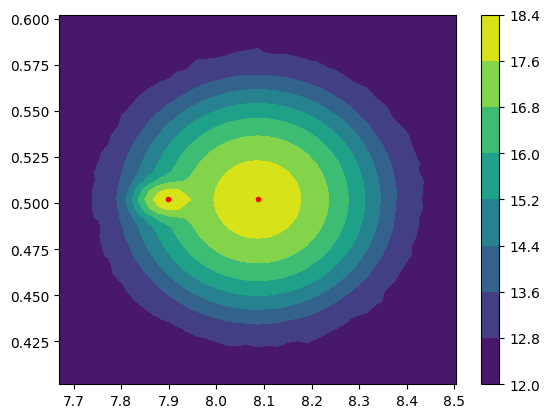

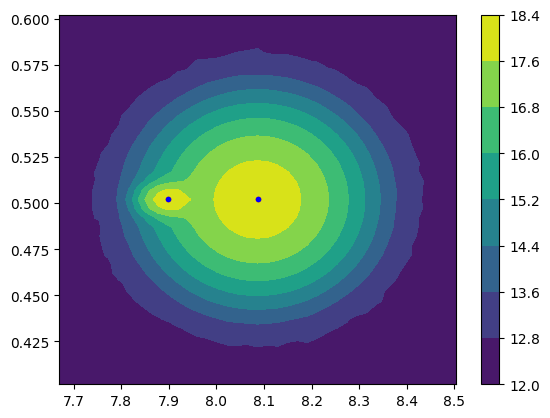

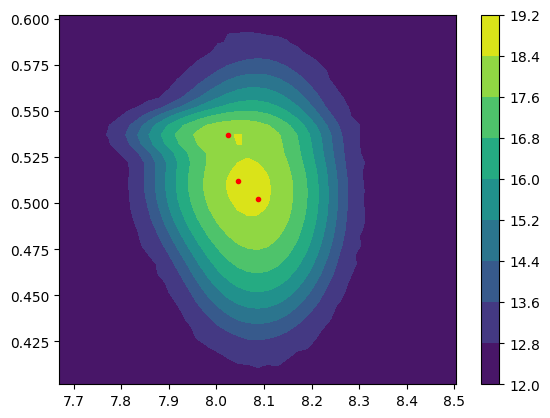

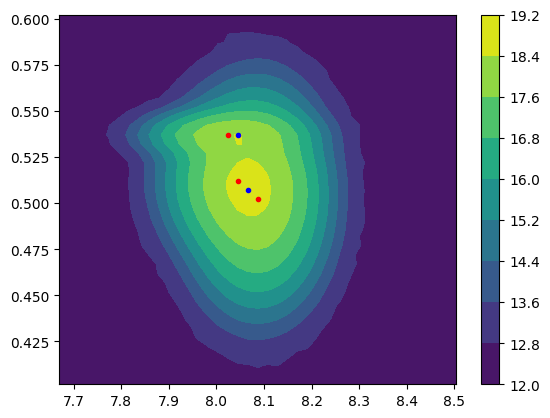

In [21]:
center_pt=[340,100]
center_pt_window_1=20
center_pt_window_2=20

plot.visualizer((chromato_obj_weak_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_weak_overlap_cd_in_chromato)
plot.visualizer((chromato_obj_weak_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_weak_overlap_cd_in_chromato, contour=u_weak_overlap_in_chromato)

plot.visualizer((chromato_obj_mid_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_mid_overlap_cd_in_chromato)
plot.visualizer((chromato_obj_mid_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_mid_overlap_cd_in_chromato, contour=u_mid_overlap_in_chromato)

plot.visualizer((chromato_obj[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_cd_in_chromato)
plot.visualizer((chromato_obj[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_cd_in_chromato, contour=u_in_chromato)

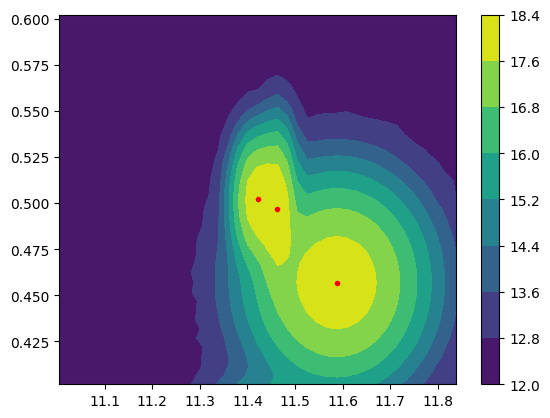

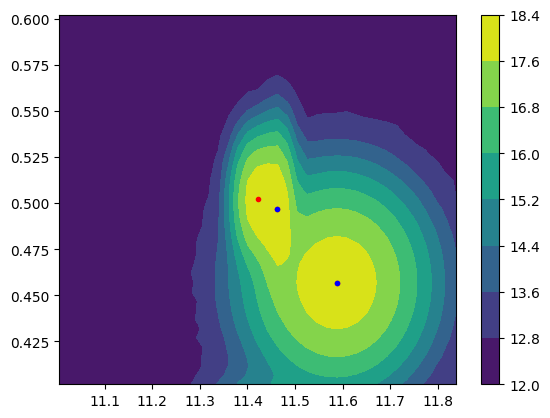

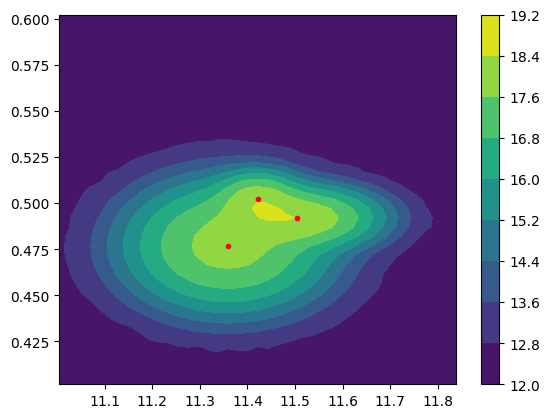

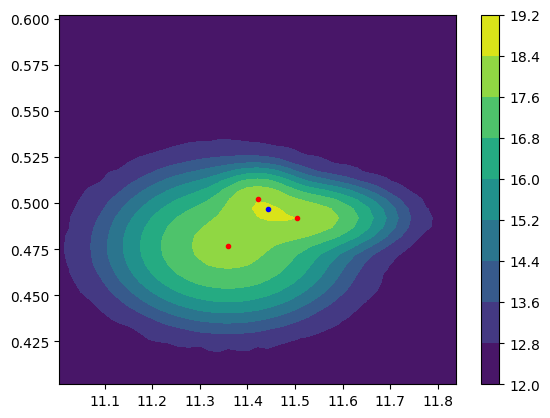

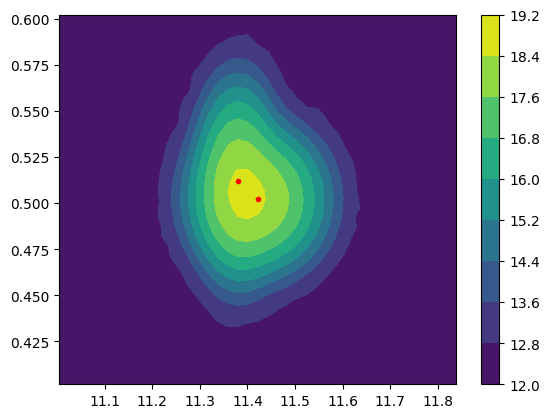

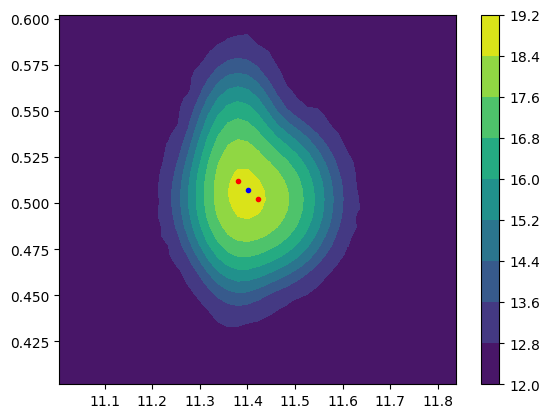

In [22]:
center_pt=[500,100]
center_pt_window_1=20
center_pt_window_2=20

plot.visualizer((chromato_obj_weak_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_weak_overlap_cd_in_chromato)
plot.visualizer((chromato_obj_weak_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_weak_overlap_cd_in_chromato, contour=u_weak_overlap_in_chromato)

plot.visualizer((chromato_obj_mid_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_mid_overlap_cd_in_chromato)
plot.visualizer((chromato_obj_mid_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_mid_overlap_cd_in_chromato, contour=u_mid_overlap_in_chromato)

plot.visualizer((chromato_obj[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_cd_in_chromato)
plot.visualizer((chromato_obj[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_cd_in_chromato, contour=u_in_chromato)

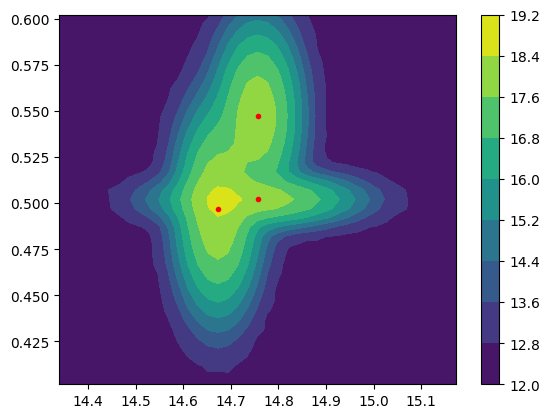

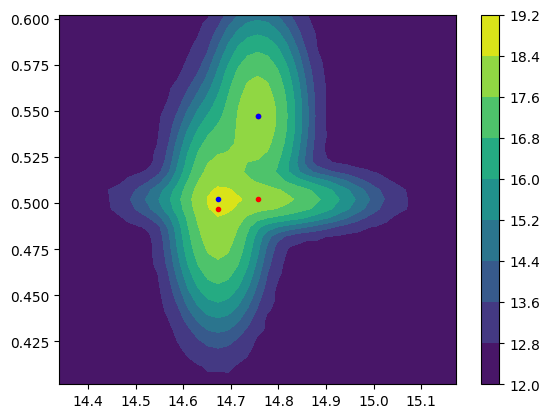

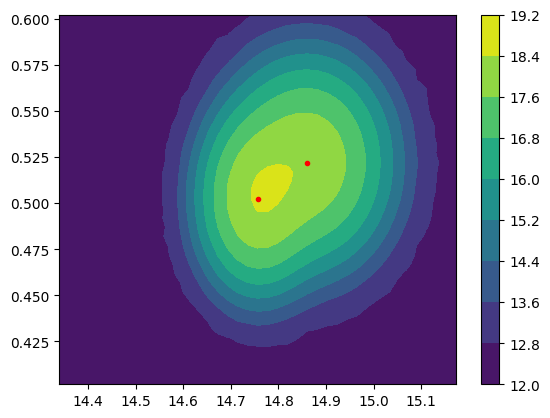

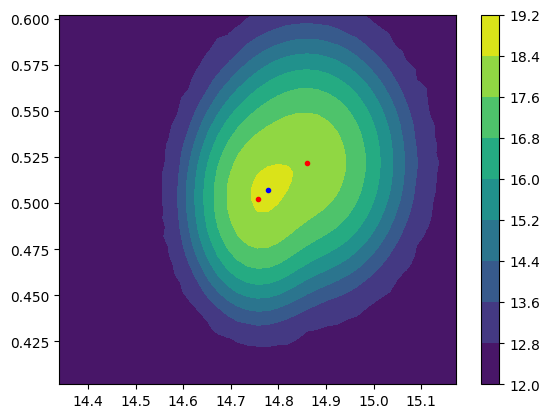

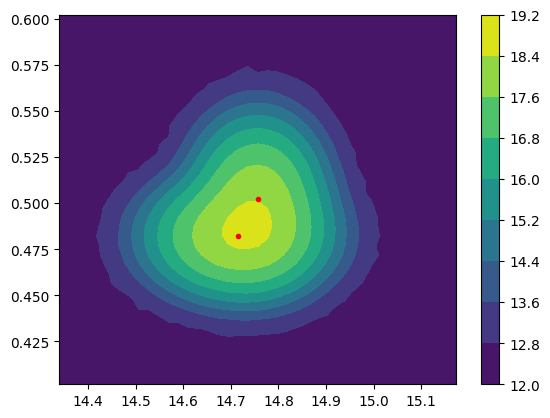

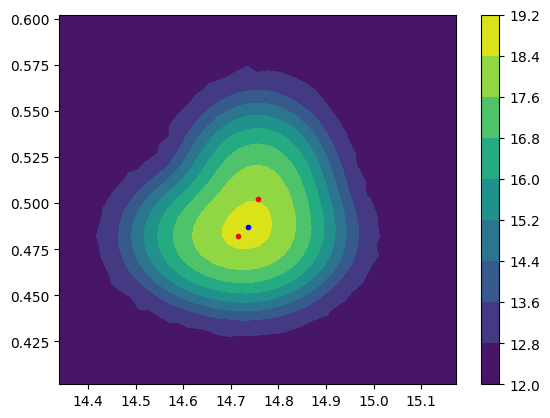

In [23]:
center_pt=[660,100]
center_pt_window_1=20
center_pt_window_2=20

plot.visualizer((chromato_obj_weak_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_weak_overlap_cd_in_chromato)
plot.visualizer((chromato_obj_weak_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_weak_overlap_cd_in_chromato, contour=u_weak_overlap_in_chromato)

plot.visualizer((chromato_obj_mid_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_mid_overlap_cd_in_chromato)
plot.visualizer((chromato_obj_mid_overlap[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_mid_overlap_cd_in_chromato, contour=u_mid_overlap_in_chromato)

plot.visualizer((chromato_obj[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_cd_in_chromato)
plot.visualizer((chromato_obj[0], chromato_obj[1]), center_pt=center_pt, center_pt_window_1=center_pt_window_1, center_pt_window_2=center_pt_window_2, points=peaks_gt_cd_in_chromato, contour=u_in_chromato)

# Verif overlap

In [42]:
tmp_chrom = np.zeros_like(chromato)

blob1_x=100
blob1_y=100
blob2_x=100
blob2_y=106

blob1_sigma_x=3.0
blob1_sigma_y=3.0
blob2_sigma_x=3.0
blob2_sigma_y=3.0

tmp_chrom=peak_simulation.create_and_add_peak(tmp_chrom, 20, 100, [blob1_x,blob1_y], sigma=(blob1_sigma_x, blob1_sigma_y))
tmp_chrom=peak_simulation.create_and_add_peak(tmp_chrom, 20, 100, [blob2_x,blob2_y], sigma=(blob2_sigma_x, blob2_sigma_y))

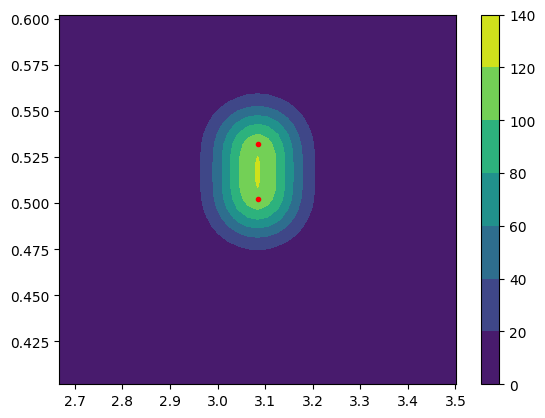

In [43]:
mu_in_chrmato=projection.matrix_to_chromato(np.array([[blob1_x, blob1_y], [blob2_x, blob2_y]]), chromato_obj[1], 1.25, chromato.shape)
plot.visualizer((tmp_chrom, chromato_obj[1]), log_chromato=False, center_pt=[blob1_x,blob1_y], center_pt_window_1=20, center_pt_window_2=20, points=mu_in_chrmato)

In [44]:
blob1=(blob1_x, blob1_y, 3*blob1_sigma_x, 3*blob1_sigma_y)
blob2=(blob2_x, blob2_y, 3*blob2_sigma_x, 3*blob2_sigma_y)
print(peak_simulation._blob_overlap(blob1, blob2, sigma_dim=2))
blob1=(blob1_x, blob1_y, 2*blob1_sigma_x, 2*blob1_sigma_y)
blob2=(blob2_x, blob2_y, 2*blob2_sigma_x, 2*blob2_sigma_y)
print(peak_simulation._blob_overlap(blob1, blob2, sigma_dim=2))
blob1=(blob1_x, blob1_y, math.sqrt(2)*blob1_sigma_x, math.sqrt(2)*blob1_sigma_y)
blob2=(blob2_x, blob2_y, math.sqrt(2)*blob2_sigma_x, math.sqrt(2)*blob2_sigma_y)
print(peak_simulation._blob_overlap(blob1, blob2, sigma_dim=2))
blob1=(blob1_x, blob1_y, 1*blob1_sigma_x, 1*blob1_sigma_y)
blob2=(blob2_x, blob2_y, 1*blob2_sigma_x, 1*blob2_sigma_y)
print(peak_simulation._blob_overlap(blob1, blob2, sigma_dim=2))

0.7026969438943625
0.5594043441634877
0.39100221895577075
0.18169011381620898


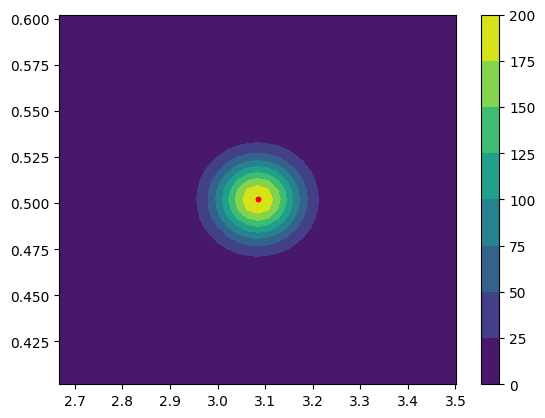

dist:  0
1.0
1.0
1.0
1.0


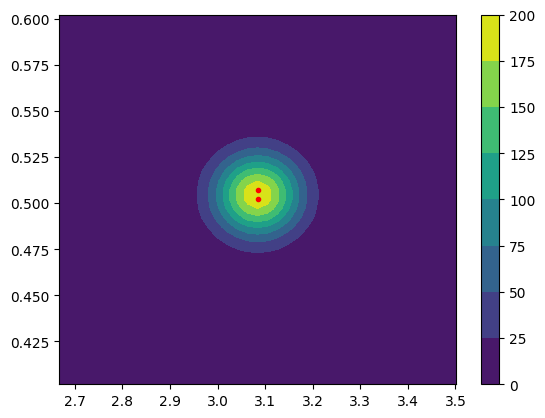

dist:  1
0.9499952944618603
0.9250170809941113
0.8940196375853878
0.8502953521460116


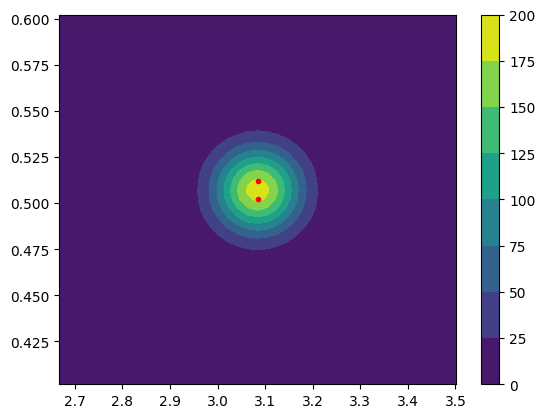

dist:  2
0.9000678660815045
0.8502953521460116
0.7887799817897366
0.7026969438943607


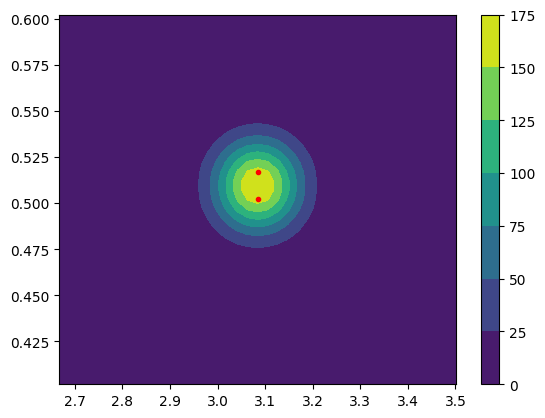

dist:  3
0.8502953521460119
0.7760987652032674
0.6850376424742927
0.5594043441634887


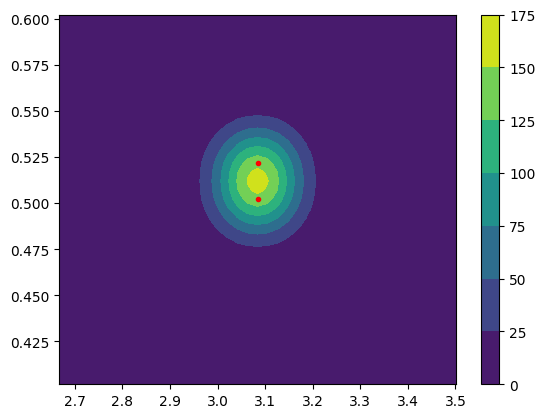

dist:  4
0.8007561186627061
0.702696943894362
0.583582811581857
0.422826261772103


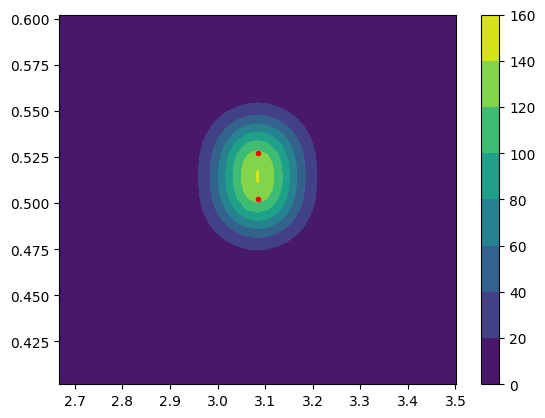

dist:  5
0.7515296463427269
0.6303684111397467
0.4852609827800226
0.295755692687676


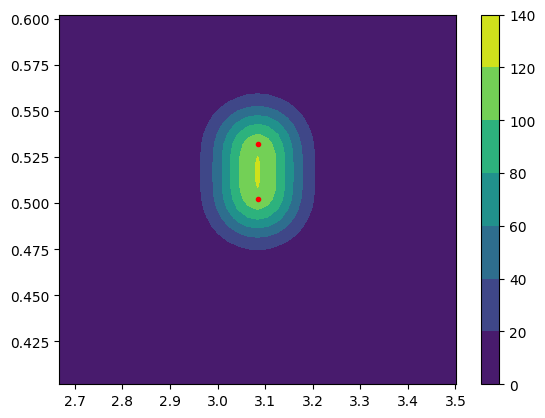

dist:  6
0.7026969438943625
0.5594043441634877
0.39100221895577075
0.18169011381620898


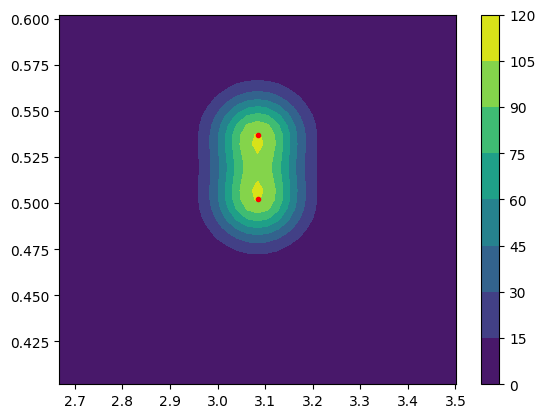

dist:  7
0.6543410001491516
0.4901131465801587
0.30186423944455026
0.08556628128992745


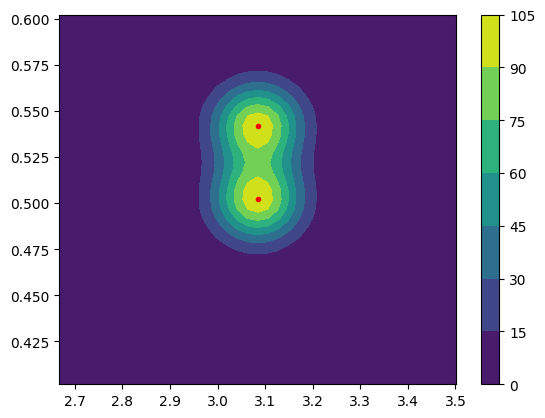

dist:  8
0.6065472889447321
0.422826261772103
0.21910203741704856
0.016276603459429058


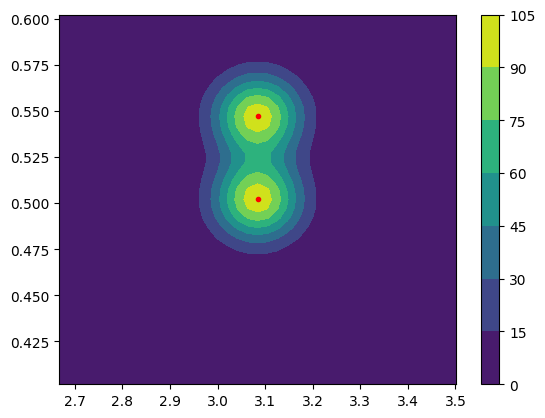

dist:  9
0.5594043441634882
0.35790588879620666
0.1442936128143875
0.0


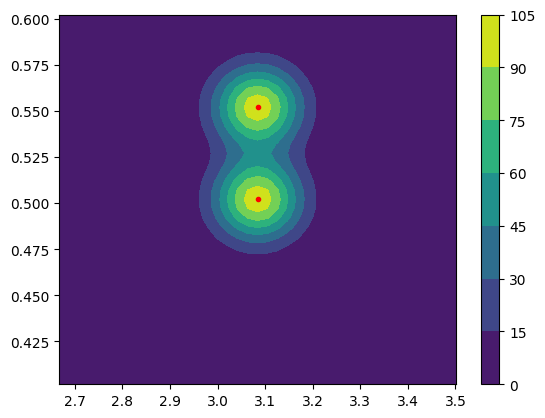

dist:  10
0.513004427311504
0.295755692687676
0.07960498081790583
0.0


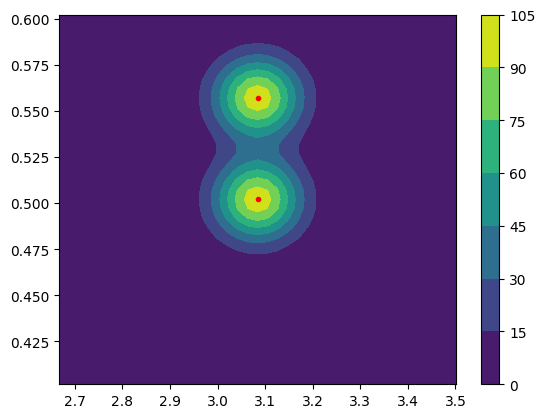

dist:  11
0.4674443172020941
0.23683642864860727
0.02851395829882794
0.0


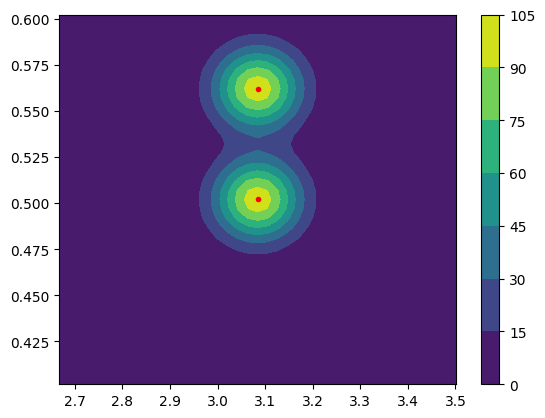

dist:  12
0.4228262617721025
0.18169011381620967
0.0
0.0


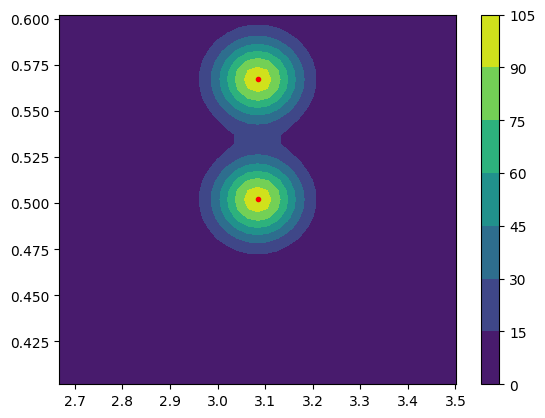

dist:  13
0.3792591475822977
0.1309803011032446
0.0
0.0


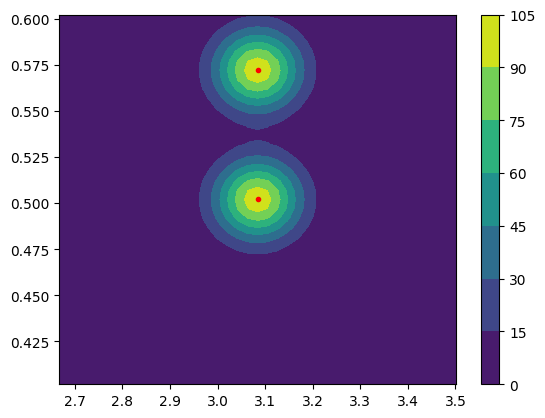

dist:  14
0.33685996611013885
0.0855662812899267
0.0
0.0


In [46]:
for i in range(15):
    tmp_chrom = np.zeros_like(chromato)

    blob1_x=100
    blob1_y=100
    blob2_x=100
    blob2_y=100 + i

    blob1_sigma_x=3.0
    blob1_sigma_y=3.0
    blob2_sigma_x=3.0
    blob2_sigma_y=3.0

    tmp_chrom=peak_simulation.create_and_add_peak(tmp_chrom, 20, 100, [blob1_x,blob1_y], sigma=(blob1_sigma_x, blob1_sigma_y))
    tmp_chrom=peak_simulation.create_and_add_peak(tmp_chrom, 20, 100, [blob2_x,blob2_y], sigma=(blob2_sigma_x, blob2_sigma_y))
    
    mu_in_chrmato=projection.matrix_to_chromato(np.array([[blob1_x, blob1_y], [blob2_x, blob2_y]]), chromato_obj[1], 1.25, chromato.shape)
    plot.visualizer((tmp_chrom, chromato_obj[1]), log_chromato=False, center_pt=[blob1_x,blob1_y], center_pt_window_1=20, center_pt_window_2=20, points=mu_in_chrmato)
    
    print("dist: ", i)
    blob1=(blob1_x, blob1_y, 3*blob1_sigma_x, 3*blob1_sigma_y)
    blob2=(blob2_x, blob2_y, 3*blob2_sigma_x, 3*blob2_sigma_y)
    print(peak_simulation._blob_overlap(blob1, blob2, sigma_dim=2))
    blob1=(blob1_x, blob1_y, 2*blob1_sigma_x, 2*blob1_sigma_y)
    blob2=(blob2_x, blob2_y, 2*blob2_sigma_x, 2*blob2_sigma_y)
    print(peak_simulation._blob_overlap(blob1, blob2, sigma_dim=2))
    blob1=(blob1_x, blob1_y, math.sqrt(2)*blob1_sigma_x, math.sqrt(2)*blob1_sigma_y)
    blob2=(blob2_x, blob2_y, math.sqrt(2)*blob2_sigma_x, math.sqrt(2)*blob2_sigma_y)
    print(peak_simulation._blob_overlap(blob1, blob2, sigma_dim=2))
    blob1=(blob1_x, blob1_y, 1*blob1_sigma_x, 1*blob1_sigma_y)
    blob2=(blob2_x, blob2_y, 1*blob2_sigma_x, 1*blob2_sigma_y)
    print(peak_simulation._blob_overlap(blob1, blob2, sigma_dim=2))